In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [134]:
from tensorflow.keras.preprocessing.image import DirectoryIterator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [135]:
image_data_gen = ImageDataGenerator(rescale=1/255.)

data_gen = DirectoryIterator('/kaggle/input/asl-dataset/asl_dataset', image_data_gen)

Found 5030 images belonging to 37 classes.


In [136]:
data_gen = image_data_gen.flow_from_directory(directory='/kaggle/input/asl-dataset/asl_dataset',
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 5030 images belonging to 37 classes.


In [142]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer

model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(37, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [143]:
model_1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_87 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_89 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [144]:
history_1 = model_1.fit(data_gen, epochs=5)

Epoch 1/5
158/158 [==============================] - 131s 821ms/step - loss: 1.4268 - accuracy: 0.4302
Epoch 2/5
158/158 [==============================] - 130s 819ms/step - loss: 0.9812 - accuracy: 0.4358
Epoch 3/5
158/158 [==============================] - 128s 807ms/step - loss: 0.9152 - accuracy: 0.4243
Epoch 4/5
158/158 [==============================] - 130s 825ms/step - loss: 0.8783 - accuracy: 0.4258
Epoch 5/5
158/158 [==============================] - 127s 805ms/step - loss: 0.8559 - accuracy: 0.4097


In [ ]:
# model_1.predict()

In [186]:
def maxIndex(list1):
    max1 = 0.0
    index = 0
    
    for i, ele in enumerate(list1):
        if ele > max:
            max1 = ele
            index = i
    return index

In [240]:
# Predecting image from random image
import random
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

def random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = imread(target_folder + "/" + random_image[0])

  return img


def predImg(model):
    class_names = os.listdir('/kaggle/input/asl-dataset/asl_dataset/')
    class_names.remove('asl_dataset')
    class_names = sorted(class_names)
    
    target_class = random.choice(class_names)
#     target_class = 'a/'
    img = random_image('/kaggle/input/asl-dataset/asl_dataset/', target_class)
    img_shape = 224
    
    img = tf.convert_to_tensor(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    print(target_class)
    img = img/255.
    
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[tf.argmax(pred[0])]
    

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class} : actual: {target_class}')
    plt.axis(False)
    return pred_class

a
1/1 [==============================] - 0s 28ms/step


'b'

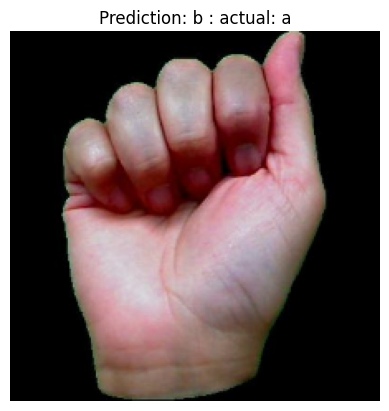

In [264]:
predImg(model_1)